## 빅데이터 활용 AI 설계
# 타임시리즈

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### MLP

In [2]:
# org = [1,2,3,4,5,6,7]
X = np.array([[1,2,3], [2,3,4], [3,4,5], [4,5,6]])
y = np.array([4,5,6,7])

In [4]:
from keras.models import Sequential
from keras.layers import Dense

C:\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
model = Sequential()
model.add(Dense(32, input_shape=(3,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='mse', optimizer='rmsprop')

In [8]:
model.fit(X, y, epochs=1000, verbose=False)

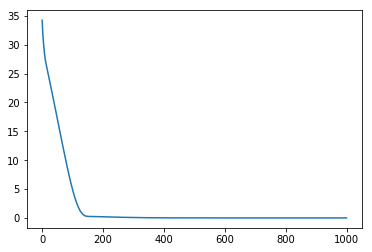

In [9]:
h = model.history.history

plt.plot(h['loss'])

In [10]:
model.predict(np.array([[5,6,7]]))

array([[8.031635]], dtype=float32)

### CNN 1Dimensional

In [15]:
X = np.array([[1,2,3], [2,3,4], [3,4,5], [4,5,6]])
y = np.array([4,5,6,7])

In [16]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

In [17]:
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(3,1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mse', optimizer='rmsprop')

In [20]:
model.fit(X[:,:,np.newaxis], y, epochs=1000, verbose=False)

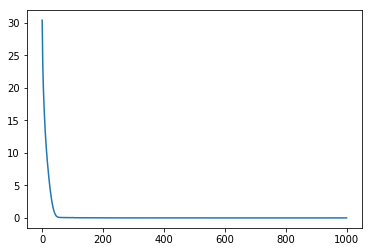

In [21]:
h = model.history.history

plt.plot(h['loss'])

In [22]:
model.predict(np.array([[5,6,7]]).reshape(1,3,1))

array([[8.137327]], dtype=float32)

### LSTM

In [23]:
X = np.array([[1,2,3], [2,3,4], [3,4,5], [4,5,6]])
y = np.array([4,5,6,7])

In [24]:
from keras.layers import LSTM

In [25]:
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(3,1))) # default: tanh
model.add(Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='mse', optimizer='rmsprop')

In [27]:
model.fit(X[:,:,np.newaxis], y, epochs=1000, verbose=False)

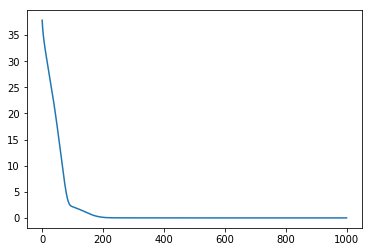

In [28]:
h = model.history.history

plt.plot(h['loss'])

In [29]:
model.predict(np.array([[5,6,7]]).reshape(1,3,1))

array([[7.897687]], dtype=float32)